### Aim: Implementation and analysis of clustering algorithms like K-Means ,K-medoid.

**K-Means Cluserting:**

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct clusters based on their similarity.

The algorithm begins by randomly initializing K cluster centroids in the feature space. Each centroid represents the mean value of the data points assigned to that cluster.

It assigns each data point to the nearest centroid based on the Euclidean distance between the data point and the centroids. The data points are then grouped together based on their assigned centroids.

After the initial assignment, the algorithm recalculates the centroids by taking the mean of all the data points within each cluster. This step aims to update the centroids' positions to better represent the data points within each cluster.

The algorithm iteratively repeats the assignment and centroid update steps until convergence is achieved. Convergence occurs when the centroids no longer move significantly or when a maximum number of iterations is reached.

K-means clustering aims to minimize the within-cluster sum of squares (WCSS) or the total squared distance between each data point and its assigned centroid. It seeks to create compact and well-separated clusters.

The final result of the K-means clustering algorithm is a set of K cluster centroids and a partitioning of the data points into K clusters. These clusters can be used for various purposes, such as grouping similar data points, identifying outliers, or initializing other machine learning algorithms. However, it is important to note that the algorithm's outcome can vary depending on the initial centroid placement and is sensitive to the choice of the number of clusters, K.

**K-Medoids:**

K-medoid clustering, also known as Partitioning Around Medoids (PAM), is a variation of K-means clustering that uses representative points called medoids instead of centroids.

The algorithm starts by randomly selecting K data points from the dataset as initial medoids. These initial medoids can be any points in the feature space.

It assigns each data point to the nearest medoid based on a distance metric, typically the Euclidean distance. The data points are grouped together based on their assigned medoids.

After the initial assignment, the algorithm evaluates the total dissimilarity or cost of the clustering solution. The dissimilarity is usually defined as the sum of distances between each data point and its assigned medoid.

The algorithm then iteratively updates the medoids within each cluster to reduce the total dissimilarity. It considers swapping a medoid with a non-medoid data point and calculates the new total dissimilarity. The medoid swap is accepted if it leads to a decrease in the total dissimilarity.

The algorithm repeats the assignment and medoid update steps until convergence is achieved. Convergence occurs when no more medoid swaps result in a decrease in the total dissimilarity or when a maximum number of iterations is reached.

The final result of K-medoid clustering is a set of K medoids and a partitioning of the data points into K clusters. Unlike K-means, where the cluster centers can be any point in the feature space, K-medoid clusters are represented by actual data points. This makes K-medoid clustering more robust to outliers or noise in the dataset.

In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
# Importing the dataset
sunny_dataset = pd.read_csv('/content/Mall_Customers.csv')
#dataset
sunny_dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

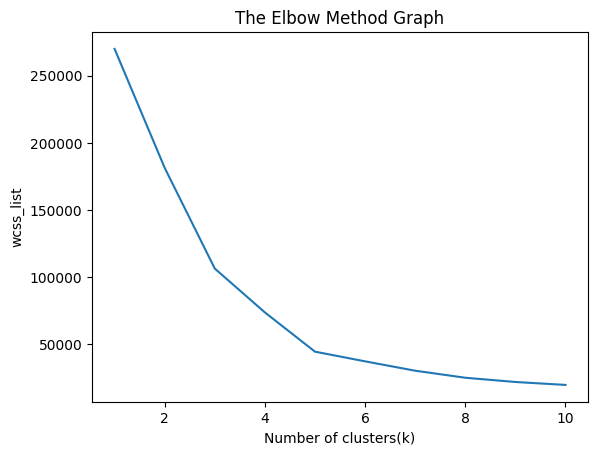

In [4]:
x = sunny_dataset.iloc[:, [3, 4]].values
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= [] #Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

TRAINING K-MEANS MODEL ON A DATASET:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


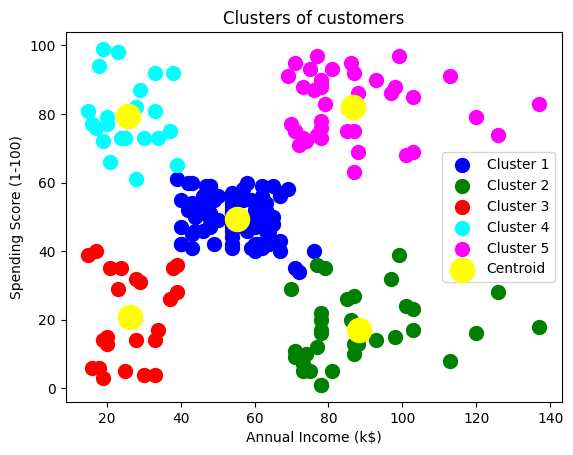

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict= kmeans.fit_predict(x)
#visualizing the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

In [7]:
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import pandas as pd #data processing
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import datasets

In [8]:
#loding Dataset
myiris = datasets.load_iris()
x = myiris.data #we get independent variables
y = myiris.target #we get target variables
myiris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
#Scaling and Fitting KMedoids:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
#to find out the cluster labels corresponding to different observations.

Silhouette Method to evaluate cluster:

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg) # we get average value of all clusters

0.4590416105554613


Silhouette Width to find number of cluster:

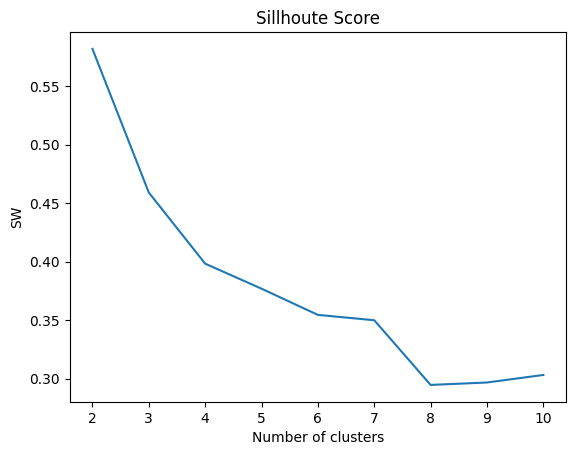

In [12]:
sw = []
for i in range(2, 11):
  kMedoids = KMedoids(n_clusters = i, random_state = 0)
  kMedoids.fit(x_scaled)
  y_kmed = kMedoids.fit_predict(x_scaled)
  silhouette_avg = silhouette_score(x_scaled, y_kmed)
  sw.append(silhouette_avg)
#different silhouette is calculated fo r different clusters
plt.plot(range(2, 11), sw)
plt.title('Sillhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW') #within cluster sum of squares
plt.show()

Computing Purity:

In [13]:
from sklearn import metrics
def purity_score(y_true, y_pred):
  # compute contingency matrix (also called confusion matrix)
  contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
  # return purity
  return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

How extreme values effect K-Medoid compared to K-means:

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.8333333333333334

Plotting values:

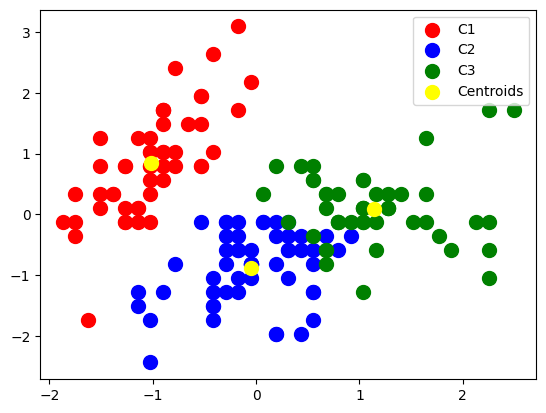

In [15]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1] , s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Adding extreme values:

In [16]:
import numpy as np
m=np.append(x,[[10,10,10,10],[15,15,15,15],[12,12,12,12]],axis =0)
m.shape
y=np.append(y,[2,2,2])
print(y)
print("we see 3 observations are added over here.-",m.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
we see 3 observations are added over here.- (153, 4)


In [17]:
scaler = StandardScaler().fit(m)
x_scaled = scaler.transform(m)
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.673202614379085

Plot:

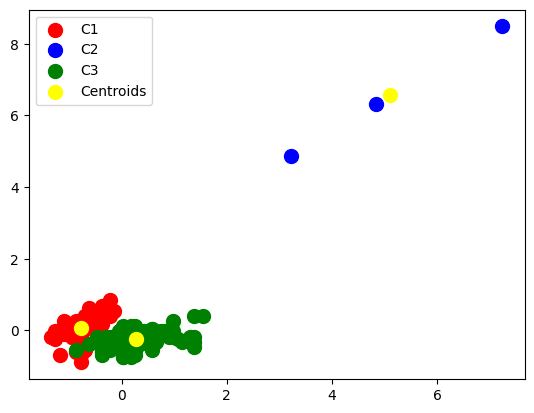

In [18]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans== 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1] , s = 100, c = 'yellow', label = 'Centroids')
#here 3 points formed cluster on their own.
plt.legend()

<Axes: title={'center': 'Cluster Quality'}, xlabel='Method'>

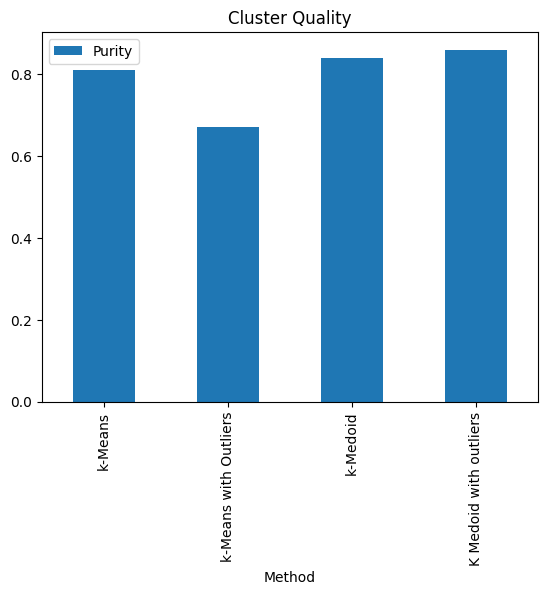

In [19]:
data = [['k-Means', 0.81], ['k-Means with Outliers', 0.67], ['k-Medoid', 0.84],['K Medoid with outliers', 0.86]]
df = pd.DataFrame(data, columns = ['Method', 'Purity'])
df.plot.bar(x='Method',y='Purity',title='Cluster Quality')

CONCLUSION:
● K-Medoids are also called PAM(Partition around Medoids)
● Mean is computed from dataset & median is chosen from dataset.
● Medoids are representative objects of a dataset or cluster with a dataset whose
average dissimilarities to all the objects in the cluster is minimal.